In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import numpy as np
from ipywidgets import widgets, interactive
from IPython.display import display

In [2]:
callouts = pd.read_csv('ACT_CALLOUTS.csv')
callouts

,CALLOUTID,DATE,PERNER,LOCATION,SHIFTSTARTTIME,SHIFTENDTIME,CALLTYPE,PAYTYPE,ISCOORD,COVERAGETYPE,CREATETIMESTAMP,UPDATETIMESTAMP
0,2022-11-13-0026,2022-11-13,890297.0,EC,1900-01-01T05:49:00Z,1900-01-01T14:19:00Z,CS/FMLA,Sick,False,NC per Area,2022-12-07T13:05:01.145368Z,2022-12-07T13:05:01.148362Z
1,2022-11-13-0099,2022-11-13,92037174.0,EC,1900-01-01T05:19:00Z,1900-01-01T13:49:00Z,CS/Free,Sick,False,NC per Area,2022-12-07T13:05:01.145368Z,2022-12-07T13:05:01.148362Z
2,2022-11-13-0032,2022-11-13,992674.0,DS,1900-01-01T09:23:00Z,1900-01-01T19:57:00Z,CS/Free,No,False,NC per Area,2022-12-07T13:05:01.145368Z,2022-12-07T13:05:01.148362Z
3,2022-11-13-0085,2022-11-13,1563477.0,MK,1900-01-01T09:24:00Z,1900-01-01T19:56:00Z,CS/Free,Vacation,False,NC per Area,2022-12-07T13:05:01.145368Z,2022-12-07T13:05:01.148362Z
4,2022-11-13-0039,2022-11-13,1134187.0,EC,1900-01-01T15:31:00Z,1900-01-02T00:01:00Z,CS/Free,Vacation,False,NC per Area,2022-12-07T13:05:01.145368Z,2022-12-07T13:05:01.148362Z
...,...,...,...,...,...,...,...,...,...,...,...,...
80613,2023-07-15-0043,2023-07-15,1220740.0,FIW,1900-01-01T22:00:00Z,1900-01-02T06:30:00Z,CS/Free,Vacation,False,NC per Area,2023-07-17T10:17:40.366619Z,2023-07-17T10:17:40.366619Z
80614,2023-07-15-0066,2023-07-15,1372866.0,FIW,1900-01-01T22:00:00Z,1900-01-02T06:30:00Z,CS/Free,No,False,Bullpen,2023-07-17T10:17:40.366619Z,2023-07-17T10:17:40.366619Z
80615,2023-07-15-0056,2023-07-15,1316015.0,FIW,1900-01-01T22:00:00Z,1900-01-02T06:30:00Z,CS/Free,Vacation,False,Bullpen,2023-07-17T10:17:40.366619Z,2023-07-17T10:17:40.366619Z
80616,2023-07-15-0007,2023-07-15,293403.0,FIW,1900-01-01T22:00:00Z,1900-01-02T06:30:00Z,CI/FMLA,Sick,False,Bullpen,2023-07-17T10:17:40.366619Z,2023-07-17T10:17:40.366619Z


In [3]:
callouts = callouts.drop('CALLOUTID', axis = 1)
callouts = callouts.drop('PAYTYPE', axis = 1)
callouts = callouts.drop('CREATETIMESTAMP', axis = 1)
callouts = callouts.drop('PERNER', axis = 1)
callouts = callouts.drop('UPDATETIMESTAMP', axis = 1)

In [4]:
false_filtered_df = callouts[~callouts['ISCOORD']]

In [5]:
false_filtered_df['DATE'] = pd.to_datetime(false_filtered_df['DATE'])

# Filter the DataFrame to include data only from the year 2023
filtered_df_2023 = false_filtered_df.loc[false_filtered_df['DATE'].dt.year == 2023]




C:\Users\gduln001\AppData\Local\Temp\2\ipykernel_16064\4077342039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_filtered_df['DATE'] = pd.to_datetime(false_filtered_df['DATE'])


In [6]:
filtered_df_2023 = filtered_df_2023.drop('CALLTYPE', axis = 1)
filtered_df_2023 = filtered_df_2023.drop('ISCOORD', axis = 1)
filtered_df_2023 = filtered_df_2023.drop('COVERAGETYPE', axis = 1)

In [7]:
df = filtered_df_2023

In [8]:
df['SHIFTSTARTTIME'] = pd.to_datetime(df['SHIFTSTARTTIME'])
df['SHIFTENDTIME'] = pd.to_datetime(df['SHIFTENDTIME'])

df['Shift_Range'] = df['SHIFTSTARTTIME'].dt.time.astype(str) + '-' + df['SHIFTENDTIME'].dt.time.astype(str)

In [9]:
# Convert 'SHIFTSTARTTIME' column to datetime if needed
df['SHIFTSTARTTIME'] = pd.to_datetime(df['SHIFTSTARTTIME'])

# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Create a new column 'shift_start_datetime' by combining 'DATE' and 'SHIFTSTARTTIME'
df['shift_start_datetime'] = df['DATE'] + pd.to_timedelta(df['SHIFTSTARTTIME'].dt.hour, unit='h')

# Create a new column to extract the hour from 'shift_start_datetime'
df['shift_start_hour'] = df['shift_start_datetime'].dt.hour


# Group the DataFrame by 'location' and 'shift_start_hour' and count the callouts
callouts_per_hour_by_location = df.groupby(['LOCATION', 'shift_start_hour']).size().reset_index(name='callouts')


C:\Users\gduln001\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
C:\Users\gduln001\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


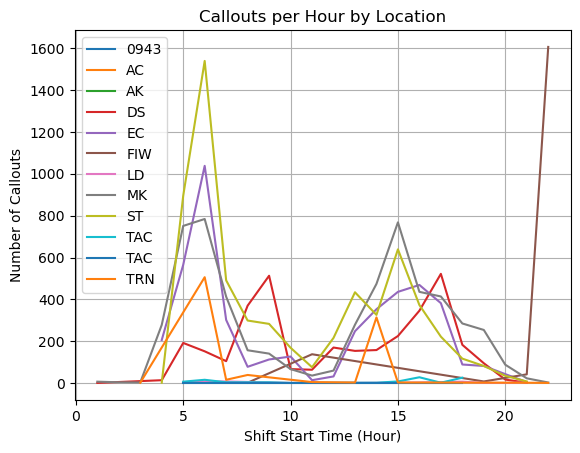

In [10]:
locations = callouts_per_hour_by_location['LOCATION'].unique()
for location in locations:
    location_data = callouts_per_hour_by_location[callouts_per_hour_by_location['LOCATION'] == location]
    plt.plot(location_data['shift_start_hour'], location_data['callouts'], label=location)

plt.xlabel('Shift Start Time (Hour)')
plt.ylabel('Number of Callouts')
plt.title('Callouts per Hour by Location')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
df['month'] = df['shift_start_datetime'].dt.month
df['week'] = df['shift_start_datetime'].dt.isocalendar().week
df['day'] = df['shift_start_datetime'].dt.day

In [12]:
df

,DATE,LOCATION,SHIFTSTARTTIME,SHIFTENDTIME,Shift_Range,shift_start_datetime,shift_start_hour,month,week,day
56922,2023-01-01,DS,1900-01-01 19:19:00+00:00,1900-01-02 02:35:00+00:00,19:19:00-02:35:00,2023-01-01 19:00:00,19.0,1.0,52,1.0
56923,2023-01-01,NaN,1900-01-01 06:25:00+00:00,1900-01-01 15:50:00+00:00,06:25:00-15:50:00,2023-01-01 06:00:00,6.0,1.0,52,1.0
56924,2023-01-01,MK,1900-01-01 06:15:00+00:00,1900-01-01 15:23:00+00:00,06:15:00-15:23:00,2023-01-01 06:00:00,6.0,1.0,52,1.0
56925,2023-01-01,MK,1900-01-01 06:27:00+00:00,1900-01-01 15:55:00+00:00,06:27:00-15:55:00,2023-01-01 06:00:00,6.0,1.0,52,1.0
56926,2023-01-01,EC,1900-01-01 12:46:00+00:00,1900-01-01 19:16:00+00:00,12:46:00-19:16:00,2023-01-01 12:00:00,12.0,1.0,52,1.0
...,...,...,...,...,...,...,...,...,...,...
80613,2023-07-15,FIW,1900-01-01 22:00:00+00:00,1900-01-02 06:30:00+00:00,22:00:00-06:30:00,2023-07-15 22:00:00,22.0,7.0,28,15.0
80614,2023-07-15,FIW,1900-01-01 22:00:00+00:00,1900-01-02 06:30:00+00:00,22:00:00-06:30:00,2023-07-15 22:00:00,22.0,7.0,28,15.0
80615,2023-07-15,FIW,1900-01-01 22:00:00+00:00,1900-01-02 06:30:00+00:00,22:00:00-06:30:00,2023-07-15 22:00:00,22.0,7.0,28,15.0
80616,2023-07-15,FIW,1900-01-01 22:00:00+00:00,1900-01-02 06:30:00+00:00,22:00:00-06:30:00,2023-07-15 22:00:00,22.0,7.0,28,15.0


In [13]:
df['day'] = df['shift_start_datetime'].dt.day
df['hour'] = df['shift_start_datetime'].dt.hour
df['week'] = df['shift_start_datetime'].dt.isocalendar().week

In [14]:
df

,DATE,LOCATION,SHIFTSTARTTIME,SHIFTENDTIME,Shift_Range,shift_start_datetime,shift_start_hour,month,week,day,hour
56922,2023-01-01,DS,1900-01-01 19:19:00+00:00,1900-01-02 02:35:00+00:00,19:19:00-02:35:00,2023-01-01 19:00:00,19.0,1.0,52,1.0,19.0
56923,2023-01-01,NaN,1900-01-01 06:25:00+00:00,1900-01-01 15:50:00+00:00,06:25:00-15:50:00,2023-01-01 06:00:00,6.0,1.0,52,1.0,6.0
56924,2023-01-01,MK,1900-01-01 06:15:00+00:00,1900-01-01 15:23:00+00:00,06:15:00-15:23:00,2023-01-01 06:00:00,6.0,1.0,52,1.0,6.0
56925,2023-01-01,MK,1900-01-01 06:27:00+00:00,1900-01-01 15:55:00+00:00,06:27:00-15:55:00,2023-01-01 06:00:00,6.0,1.0,52,1.0,6.0
56926,2023-01-01,EC,1900-01-01 12:46:00+00:00,1900-01-01 19:16:00+00:00,12:46:00-19:16:00,2023-01-01 12:00:00,12.0,1.0,52,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
80613,2023-07-15,FIW,1900-01-01 22:00:00+00:00,1900-01-02 06:30:00+00:00,22:00:00-06:30:00,2023-07-15 22:00:00,22.0,7.0,28,15.0,22.0
80614,2023-07-15,FIW,1900-01-01 22:00:00+00:00,1900-01-02 06:30:00+00:00,22:00:00-06:30:00,2023-07-15 22:00:00,22.0,7.0,28,15.0,22.0
80615,2023-07-15,FIW,1900-01-01 22:00:00+00:00,1900-01-02 06:30:00+00:00,22:00:00-06:30:00,2023-07-15 22:00:00,22.0,7.0,28,15.0,22.0
80616,2023-07-15,FIW,1900-01-01 22:00:00+00:00,1900-01-02 06:30:00+00:00,22:00:00-06:30:00,2023-07-15 22:00:00,22.0,7.0,28,15.0,22.0


In [15]:
df['shift_start_datetime'] = pd.to_datetime(df['shift_start_datetime'])


callouts_per_location_per_hour_date = df.groupby(['LOCATION', 'DATE', 'hour']).size().reset_index(name='Callouts_Count')

df = callouts_per_location_per_hour_date

In [16]:
df['DATE'] = pd.to_datetime(df['DATE'])

# Next, convert 'hour' column to timedelta format
df['hour'] = pd.to_timedelta(df['hour'], unit='h')

# Add 'hour' to 'DATE' to get the combined datetime
df['combined_datetime'] = df['DATE'] + df['hour']

# Drop the original 'hour' column if you no longer need it
df.drop(columns=['hour'], inplace=True)

# Now, 'combined_datetime' column contains the desired datetime
df

,LOCATION,DATE,Callouts_Count,combined_datetime
0,0943,2023-06-26,1,2023-06-26 14:00:00
1,AC,2023-02-19,1,2023-02-19 10:00:00
2,AK,2023-03-05,1,2023-03-05 08:00:00
3,DS,2023-01-01,1,2023-01-01 05:00:00
4,DS,2023-01-01,1,2023-01-01 06:00:00
...,...,...,...,...
9103,TRN,2023-07-13,1,2023-07-13 14:00:00
9104,TRN,2023-07-14,1,2023-07-14 06:00:00
9105,TRN,2023-07-14,1,2023-07-14 08:00:00
9106,TRN,2023-07-14,4,2023-07-14 14:00:00


In [17]:
df['combined_datetime'] = pd.to_datetime(df['combined_datetime'])

# Group the DataFrame by 'LOCATION'
grouped_df = df.groupby('LOCATION')

# Create a dictionary to store the DataFrames for each 'LOCATION'
location_dfs = {}
for location, group in grouped_df:
    # Make a copy of the group to avoid modifying the original DataFrame
    location_dfs[location] = group.copy()


In [18]:
MK = location_dfs['MK']
EC = location_dfs['EC']
DS = location_dfs['DS']
ST = location_dfs['ST']
FIW = location_dfs['FIW']
TRN = location_dfs['TRN']
AK = location_dfs['AK']
TAC = location_dfs['TAC']
LD = location_dfs['LD']

In [19]:
MK

,LOCATION,DATE,Callouts_Count,combined_datetime
4156,MK,2023-01-01,1,2023-01-01 04:00:00
4157,MK,2023-01-01,5,2023-01-01 05:00:00
4158,MK,2023-01-01,6,2023-01-01 06:00:00
4159,MK,2023-01-01,1,2023-01-01 07:00:00
4160,MK,2023-01-01,1,2023-01-01 12:00:00
...,...,...,...,...
6453,MK,2023-07-15,4,2023-07-15 15:00:00
6454,MK,2023-07-15,1,2023-07-15 16:00:00
6455,MK,2023-07-15,1,2023-07-15 17:00:00
6456,MK,2023-07-15,2,2023-07-15 18:00:00


In [20]:
def plot_line_graph(month):
    plt.figure(figsize=(10, 6))
    
    # Filter the DataFrame for the selected month
    filtered_df = MK[MK['combined_datetime'].dt.month == month]
    
    plt.plot(filtered_df['combined_datetime'], filtered_df['Callouts_Count'], marker='o', linestyle='-', color='b')
    plt.xlabel('Date and Time')
    plt.ylabel('Callouts Count')
    plt.title(f'Callouts Count for {filtered_df["DATE"].iloc[0]}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    # Display the graph
    plt.show()

# Create the widget to select the month
month_selector = widgets.IntSlider(min=1, max=12, step=1, value=1, description='Select Month:')
widgets.interactive(plot_line_graph, month=month_selector)

interactive(children=(IntSlider(value=1, description='Select Month:', max=12, min=1), Output()), _dom_classes=…

In [21]:
def plot_line_graph(selected_date):
    plt.figure(figsize=(10, 6))
    
    # Filter the DataFrame for the selected day
    MKfiltered_df = MK[MK['combined_datetime'].dt.date == selected_date]
    
    plt.plot(MKfiltered_df['combined_datetime'], MKfiltered_df['Callouts_Count'], marker='o', linestyle='-', color='b')
    plt.xlabel('Date and Time')
    plt.ylabel('Callouts Count')
    plt.title(f'MK Callouts Count for {selected_date}')
    plt.xticks(rotation=45)

    # Customize the x-axis date format for better readability
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
    plt.grid(True)
    plt.tight_layout()

    # Display the graph
    plt.show()

# Create the widget to select the day
day_selector = widgets.DatePicker(description='Select Date:')

widgets.interactive(plot_line_graph, selected_date=day_selector)


interactive(children=(DatePicker(value=None, description='Select Date:', step=1), Output()), _dom_classes=('wi…

In [22]:
MK['hour'] = MK['combined_datetime'].dt.hour

# Group the data by the hour and calculate the average callouts for each hour
MKaverage_callouts_by_hour = MK.groupby('hour')['Callouts_Count'].mean()

MKaverage_callouts_by_hour

hour
1     2.333333
2     2.000000
3     1.500000
4     1.816993
5     3.952632
6     4.104712
7     2.401163
8     1.414414
9     1.342857
10    1.116667
11    1.090909
12    1.132075
13    1.897959
14    2.648045
15    4.063492
16    2.463277
17    2.421053
18    1.938776
19    1.801418
20    1.543860
21    1.437500
22    1.000000
Name: Callouts_Count, dtype: float64

In [23]:
def plot_line_graph(selected_date):
    plt.figure(figsize=(10, 6))
    
    # Filter the DataFrame for the selected day
    filtered_df = EC[EC['combined_datetime'].dt.date == selected_date]
    
    plt.plot(filtered_df['combined_datetime'], filtered_df['Callouts_Count'], marker='o', linestyle='-', color='b')
    plt.xlabel('Date and Time')
    plt.ylabel('Callouts Count')
    plt.title(f'EC Callouts Count for {selected_date}')
    plt.xticks(rotation=45)

    # Customize the x-axis date format for better readability
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
    plt.grid(True)
    plt.tight_layout()

    # Display the graph
    plt.show()

# Create the widget to select the day
day_selector = widgets.DatePicker(description='Select Date:')

widgets.interactive(plot_line_graph, selected_date=day_selector)


interactive(children=(DatePicker(value=None, description='Select Date:', step=1), Output()), _dom_classes=('wi…

In [24]:
dataframes = {
    'MK': MK,
    'EC': EC,
    'DS': DS,
    'ST': ST,
    'FIW': FIW,
    'TRN': TRN,
    'AK': AK,
    'TAC': TAC,
    'LD': LD
}

for df_name, df in dataframes.items():
    df['hour'] = df['combined_datetime'].dt.hour
    average_callouts_by_hour = df.groupby('hour')['Callouts_Count'].mean()
    print(f"Average callouts by hour for {df_name}:")
    print(average_callouts_by_hour)
    print("\n")

Average callouts by hour for MK:
hour
1     2.333333
2     2.000000
3     1.500000
4     1.816993
5     3.952632
6     4.104712
7     2.401163
8     1.414414
9     1.342857
10    1.116667
11    1.090909
12    1.132075
13    1.897959
14    2.648045
15    4.063492
16    2.463277
17    2.421053
18    1.938776
19    1.801418
20    1.543860
21    1.437500
22    1.000000
Name: Callouts_Count, dtype: float64


Average callouts by hour for EC:
hour
4     1.622047
5     3.174157
6     5.295918
7     2.000000
8     1.164179
9     1.378049
10    1.351064
11    1.000000
12    1.066667
13    1.797101
14    2.126506
15    2.491429
16    2.591160
17    2.195402
18    1.202703
19    1.389831
20    1.228571
21    1.000000
Name: Callouts_Count, dtype: float64


Average callouts by hour for DS:
hour
1     1.000000
4     1.000000
5     1.523810
6     1.490196
7     1.235294
8     2.242424
9     2.834254
10    1.155172
11    1.163636
12    1.428571
13    1.400000
14    1.423423
15    1.691729
16    2.07185

In [25]:
dataframes = {
    'MK': MK,
    'EC': EC,
    'DS': DS,
    'ST': ST,
    'FIW': FIW,
    'TRN': TRN,
    'AK': AK,
    'TAC': TAC,
    'LD': LD
}

for df_name, df in dataframes.items():
    df['hour'] = df['combined_datetime'].dt.hour
    average_callouts_by_hour = df.groupby('hour')['Callouts_Count'].mean()
    print(f"Average callouts by hour for {df_name}:")
    print(average_callouts_by_hour)
    print("\n")

Average callouts by hour for MK:
hour
1     2.333333
2     2.000000
3     1.500000
4     1.816993
5     3.952632
6     4.104712
7     2.401163
8     1.414414
9     1.342857
10    1.116667
11    1.090909
12    1.132075
13    1.897959
14    2.648045
15    4.063492
16    2.463277
17    2.421053
18    1.938776
19    1.801418
20    1.543860
21    1.437500
22    1.000000
Name: Callouts_Count, dtype: float64


Average callouts by hour for EC:
hour
4     1.622047
5     3.174157
6     5.295918
7     2.000000
8     1.164179
9     1.378049
10    1.351064
11    1.000000
12    1.066667
13    1.797101
14    2.126506
15    2.491429
16    2.591160
17    2.195402
18    1.202703
19    1.389831
20    1.228571
21    1.000000
Name: Callouts_Count, dtype: float64


Average callouts by hour for DS:
hour
1     1.000000
4     1.000000
5     1.523810
6     1.490196
7     1.235294
8     2.242424
9     2.834254
10    1.155172
11    1.163636
12    1.428571
13    1.400000
14    1.423423
15    1.691729
16    2.07185

In [26]:
dataframes = {
    'MK': MK,
    'EC': EC,
    'DS': DS,
    'ST': ST,
    'FIW': FIW,
    'TRN': TRN,
    'AK': AK,
    'TAC': TAC,
    'LD': LD
}

for df_name, df in dataframes.items():
    df['hour'] = df['combined_datetime'].dt.hour
    percentile_60_callouts_by_hour = df.groupby('hour')['Callouts_Count'].quantile(0.6)
    print(f"60th percentile callouts by hour for {df_name}:")
    print(percentile_60_callouts_by_hour)
    print("\n")

60th percentile callouts by hour for MK:
hour
1     2.4
2     2.0
3     1.6
4     2.0
5     4.0
6     4.0
7     2.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    2.0
14    3.0
15    4.0
16    2.0
17    3.0
18    2.0
19    2.0
20    1.0
21    1.0
22    1.0
Name: Callouts_Count, dtype: float64


60th percentile callouts by hour for EC:
hour
4     2.0
5     3.0
6     6.0
7     2.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    2.0
14    2.0
15    3.0
16    3.0
17    2.0
18    1.0
19    1.0
20    1.0
21    1.0
Name: Callouts_Count, dtype: float64


60th percentile callouts by hour for DS:
hour
1     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     2.0
9     3.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    2.0
16    2.0
17    3.0
18    1.0
19    1.0
20    1.0
21    1.0
Name: Callouts_Count, dtype: float64


60th percentile callouts by hour for ST:
hour
4     1.0
5     5.0
6     8.0
7     3.0
8     2.0
9     2.0
10    1.0
11    1.0
12    2.0
13    3.0
14    2.0

In [27]:
MK

,LOCATION,DATE,Callouts_Count,combined_datetime,hour
4156,MK,2023-01-01,1,2023-01-01 04:00:00,4
4157,MK,2023-01-01,5,2023-01-01 05:00:00,5
4158,MK,2023-01-01,6,2023-01-01 06:00:00,6
4159,MK,2023-01-01,1,2023-01-01 07:00:00,7
4160,MK,2023-01-01,1,2023-01-01 12:00:00,12
...,...,...,...,...,...
6453,MK,2023-07-15,4,2023-07-15 15:00:00,15
6454,MK,2023-07-15,1,2023-07-15 16:00:00,16
6455,MK,2023-07-15,1,2023-07-15 17:00:00,17
6456,MK,2023-07-15,2,2023-07-15 18:00:00,18


In [28]:
df = MK

# Step 1: Generate full date range for 2023
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 7, 15)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Create a DataFrame for the full date range with all hours
full_date_range_df = pd.DataFrame({'DATE': np.repeat(date_range, 24),
                                   'hour': np.tile(range(24), len(date_range))})

# Step 2: Merge the full date range with the existing dataset
merged_df = pd.merge(full_date_range_df, df, on=['DATE', 'hour'], how='left')

# Step 3: Fill in missing callout counts with zeros
merged_df['Callouts_Count'].fillna(0, inplace=True)

# Step 4: Calculate the average number of callouts per day
average_callouts_per_day = merged_df.groupby('DATE')['Callouts_Count'].mean().reset_index()

print(average_callouts_per_day)

          DATE  Callouts_Count
0   2023-01-01        1.250000
1   2023-01-02        1.000000
2   2023-01-03        1.458333
3   2023-01-04        1.958333
4   2023-01-05        1.291667
..         ...             ...
191 2023-07-11        0.916667
192 2023-07-12        0.708333
193 2023-07-13        0.875000
194 2023-07-14        0.958333
195 2023-07-15        0.958333

[196 rows x 2 columns]


In [29]:
df = MK

# Step 1: Generate full date range for 2023
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 7, 15)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Create a DataFrame for the full date range with all hours
full_date_range_df = pd.DataFrame({'DATE': np.repeat(date_range, 24),
                                   'hour': np.tile(range(24), len(date_range))})

# Step 2: Merge the full date range with the existing dataset
merged_df = pd.merge(full_date_range_df, df, on=['DATE', 'hour'], how='left')

# Step 3: Fill in missing callout counts with zeros
merged_df['Callouts_Count'].fillna(0, inplace=True)

# Step 4: Calculate the average number of callouts per hour
average_callouts_per_hour = merged_df.groupby('hour')['Callouts_Count'].mean().reset_index()

print(average_callouts_per_hour)

    hour  Callouts_Count
0      0        0.000000
1      1        0.035714
2      2        0.020408
3      3        0.015306
4      4        1.418367
5      5        3.831633
6      6        4.000000
7      7        2.107143
8      8        0.801020
9      9        0.719388
10    10        0.341837
11    11        0.183673
12    12        0.306122
13    13        1.423469
14    14        2.418367
15    15        3.918367
16    16        2.224490
17    17        2.112245
18    18        1.454082
19    19        1.295918
20    20        0.448980
21    21        0.117347
22    22        0.015306
23    23        0.000000


In [30]:
df = MK

# Step 1: Generate full date range for 2023
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 7, 15)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Create a DataFrame for the full date range with all hours
full_date_range_df = pd.DataFrame({'DATE': np.repeat(date_range, 24),
                                   'hour': np.tile(range(24), len(date_range))})

# Step 2: Merge the full date range with the existing dataset
merged_df = pd.merge(full_date_range_df, df, on=['DATE', 'hour'], how='left')

# Step 3: Fill in missing callout counts with zeros
merged_df['Callouts_Count'].fillna(0, inplace=True)

# Step 4: Calculate the average number of callouts per hour
average_callouts_per_hour = merged_df.groupby('hour')['Callouts_Count'].mean().reset_index()

# Step 5: Calculate the 60th percentile of the callouts count per hour
percentile_60 = merged_df.groupby('hour')['Callouts_Count'].quantile(0.6).reset_index()

print("Average Callouts per Hour:")
print(average_callouts_per_hour)

print("\n60th Percentile of Callouts Count per Hour:")
print(percentile_60)



Average Callouts per Hour:
    hour  Callouts_Count
0      0        0.000000
1      1        0.035714
2      2        0.020408
3      3        0.015306
4      4        1.418367
5      5        3.831633
6      6        4.000000
7      7        2.107143
8      8        0.801020
9      9        0.719388
10    10        0.341837
11    11        0.183673
12    12        0.306122
13    13        1.423469
14    14        2.418367
15    15        3.918367
16    16        2.224490
17    17        2.112245
18    18        1.454082
19    19        1.295918
20    20        0.448980
21    21        0.117347
22    22        0.015306
23    23        0.000000

60th Percentile of Callouts Count per Hour:
    hour  Callouts_Count
0      0             0.0
1      1             0.0
2      2             0.0
3      3             0.0
4      4             2.0
5      5             4.0
6      6             4.0
7      7             2.0
8      8             1.0
9      9             1.0
10    10             0.0
11 

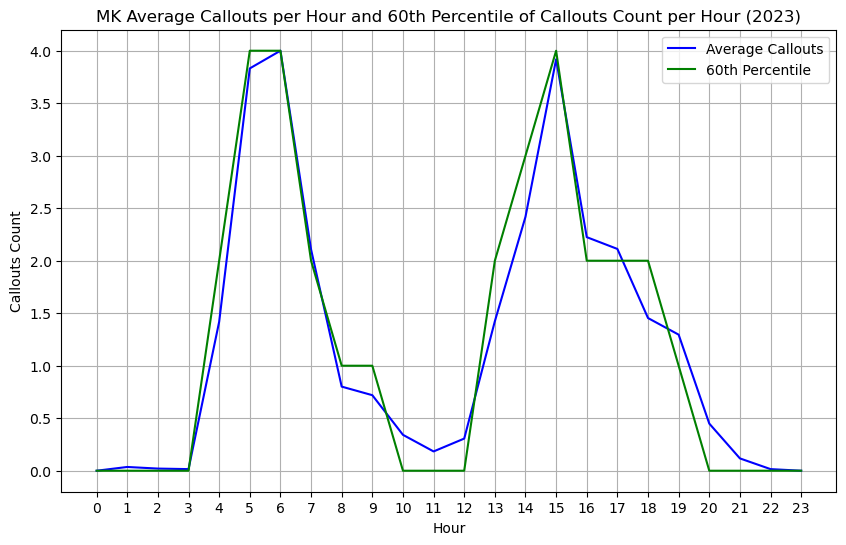

In [31]:
#MK

plt.figure(figsize=(10, 6))

# Plot the average callouts per hour
plt.plot(average_callouts_per_hour['hour'], average_callouts_per_hour['Callouts_Count'], label='Average Callouts', color='blue')

# Plot the 60th percentile of callouts count per hour
plt.plot(percentile_60['hour'], percentile_60['Callouts_Count'], label='60th Percentile', color='green')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Callouts Count')
plt.title('MK Average Callouts per Hour and 60th Percentile of Callouts Count per Hour (2023)')

# Show grid
plt.grid(True)

# Show legend
plt.legend()

hours = list(range(24))
plt.xticks(hours)

# Show the plot
plt.show()

In [32]:
df = EC

# Step 1: Generate full date range for 2023
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 7, 15)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Create a DataFrame for the full date range with all hours
full_date_range_df = pd.DataFrame({'DATE': np.repeat(date_range, 24),
                                   'hour': np.tile(range(24), len(date_range))})

# Step 2: Merge the full date range with the existing dataset
merged_df = pd.merge(full_date_range_df, df, on=['DATE', 'hour'], how='left')

# Step 3: Fill in missing callout counts with zeros
merged_df['Callouts_Count'].fillna(0, inplace=True)

# Step 4: Calculate the average number of callouts per hour
average_callouts_per_hour = merged_df.groupby('hour')['Callouts_Count'].mean().reset_index()

# Step 5: Calculate the 60th percentile of the callouts count per hour
percentile_60 = merged_df.groupby('hour')['Callouts_Count'].quantile(0.6).reset_index()

print("Average Callouts per Hour:")
print(average_callouts_per_hour)

print("\n60th Percentile of Callouts Count per Hour:")
print(percentile_60)

Average Callouts per Hour:
    hour  Callouts_Count
0      0        0.000000
1      1        0.000000
2      2        0.000000
3      3        0.000000
4      4        1.051020
5      5        2.882653
6      6        5.295918
7      7        1.540816
8      8        0.397959
9      9        0.576531
10    10        0.647959
11    11        0.071429
12    12        0.163265
13    13        1.265306
14    14        1.801020
15    15        2.224490
16    16        2.392857
17    17        1.948980
18    18        0.454082
19    19        0.418367
20    20        0.219388
21    21        0.025510
22    22        0.000000
23    23        0.000000

60th Percentile of Callouts Count per Hour:
    hour  Callouts_Count
0      0             0.0
1      1             0.0
2      2             0.0
3      3             0.0
4      4             1.0
5      5             3.0
6      6             6.0
7      7             2.0
8      8             0.0
9      9             1.0
10    10             1.0
11 

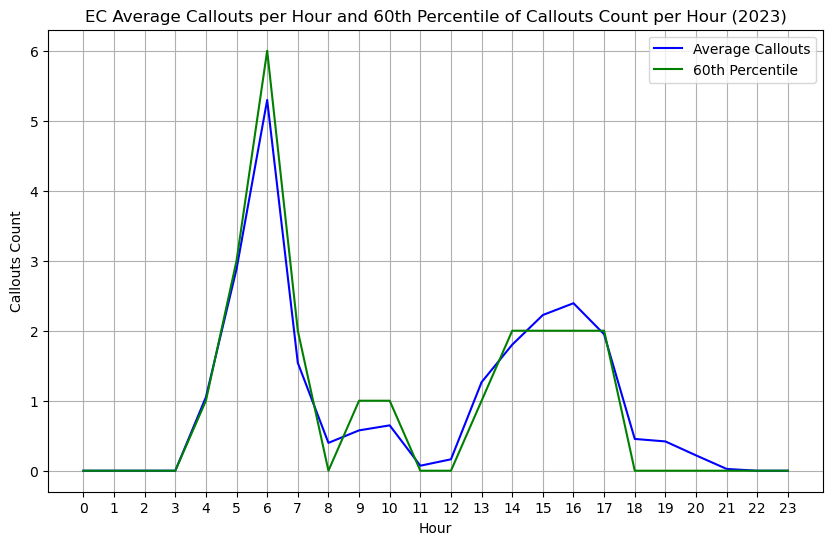

In [33]:
#EC

plt.figure(figsize=(10, 6))

# Plot the average callouts per hour
plt.plot(average_callouts_per_hour['hour'], average_callouts_per_hour['Callouts_Count'], label='Average Callouts', color='blue')

# Plot the 60th percentile of callouts count per hour
plt.plot(percentile_60['hour'], percentile_60['Callouts_Count'], label='60th Percentile', color='green')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Callouts Count')
plt.title('EC Average Callouts per Hour and 60th Percentile of Callouts Count per Hour (2023)')

# Show grid
plt.grid(True)

# Show legend
plt.legend()

hours = list(range(24))
plt.xticks(hours)

# Show the plot
plt.show()

In [34]:
df = DS

# Step 1: Generate full date range for 2023
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 7, 15)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Create a DataFrame for the full date range with all hours
full_date_range_df = pd.DataFrame({'DATE': np.repeat(date_range, 24),
                                   'hour': np.tile(range(24), len(date_range))})

# Step 2: Merge the full date range with the existing dataset
merged_df = pd.merge(full_date_range_df, df, on=['DATE', 'hour'], how='left')

# Step 3: Fill in missing callout counts with zeros
merged_df['Callouts_Count'].fillna(0, inplace=True)

# Step 4: Calculate the average number of callouts per hour
average_callouts_per_hour = merged_df.groupby('hour')['Callouts_Count'].mean().reset_index()

# Step 5: Calculate the 60th percentile of the callouts count per hour
percentile_60 = merged_df.groupby('hour')['Callouts_Count'].quantile(0.6).reset_index()

print("Average Callouts per Hour:")
print(average_callouts_per_hour)

print("\n60th Percentile of Callouts Count per Hour:")
print(percentile_60)

Average Callouts per Hour:
    hour  Callouts_Count
0      0        0.000000
1      1        0.005102
2      2        0.000000
3      3        0.000000
4      4        0.071429
5      5        0.979592
6      6        0.775510
7      7        0.535714
8      8        1.887755
9      9        2.617347
10    10        0.341837
11    11        0.326531
12    12        0.867347
13    13        0.785714
14    14        0.806122
15    15        1.147959
16    16        1.765306
17    17        2.663265
18    18        0.933673
19    19        0.484694
20    20        0.086735
21    21        0.010204
22    22        0.000000
23    23        0.000000

60th Percentile of Callouts Count per Hour:
    hour  Callouts_Count
0      0             0.0
1      1             0.0
2      2             0.0
3      3             0.0
4      4             0.0
5      5             1.0
6      6             1.0
7      7             1.0
8      8             2.0
9      9             3.0
10    10             0.0
11 

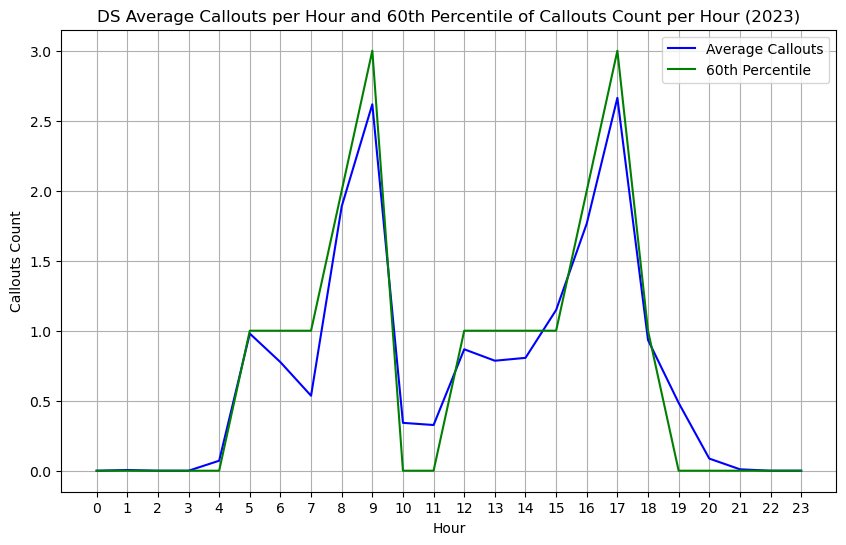

In [35]:
#DS

plt.figure(figsize=(10, 6))

# Plot the average callouts per hour
plt.plot(average_callouts_per_hour['hour'], average_callouts_per_hour['Callouts_Count'], label='Average Callouts', color='blue')

# Plot the 60th percentile of callouts count per hour
plt.plot(percentile_60['hour'], percentile_60['Callouts_Count'], label='60th Percentile', color='green')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Callouts Count')
plt.title('DS Average Callouts per Hour and 60th Percentile of Callouts Count per Hour (2023)')

# Show grid
plt.grid(True)

# Show legend
plt.legend()

hours = list(range(24))
plt.xticks(hours)

# Show the plot
plt.show()

In [36]:
df = ST

# Step 1: Generate full date range for 2023
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 7, 15)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Create a DataFrame for the full date range with all hours
full_date_range_df = pd.DataFrame({'DATE': np.repeat(date_range, 24),
                                   'hour': np.tile(range(24), len(date_range))})

# Step 2: Merge the full date range with the existing dataset
merged_df = pd.merge(full_date_range_df, df, on=['DATE', 'hour'], how='left')

# Step 3: Fill in missing callout counts with zeros
merged_df['Callouts_Count'].fillna(0, inplace=True)

# Step 4: Calculate the average number of callouts per hour
average_callouts_per_hour = merged_df.groupby('hour')['Callouts_Count'].mean().reset_index()

# Step 5: Calculate the 60th percentile of the callouts count per hour
percentile_60 = merged_df.groupby('hour')['Callouts_Count'].quantile(0.6).reset_index()

print("Average Callouts per Hour:")
print(average_callouts_per_hour)

print("\n60th Percentile of Callouts Count per Hour:")
print(percentile_60)

Average Callouts per Hour:
    hour  Callouts_Count
0      0        0.000000
1      1        0.000000
2      2        0.000000
3      3        0.000000
4      4        0.010204
5      5        4.566327
6      6        7.852041
7      7        2.505102
8      8        1.525510
9      9        1.443878
10    10        0.862245
11    11        0.387755
12    12        1.102041
13    13        2.214286
14    14        1.663265
15    15        3.260204
16    16        1.903061
17    17        1.132653
18    18        0.596939
19    19        0.418367
20    20        0.178571
21    21        0.040816
22    22        0.000000
23    23        0.000000

60th Percentile of Callouts Count per Hour:
    hour  Callouts_Count
0      0             0.0
1      1             0.0
2      2             0.0
3      3             0.0
4      4             0.0
5      5             5.0
6      6             8.0
7      7             3.0
8      8             2.0
9      9             2.0
10    10             1.0
11 

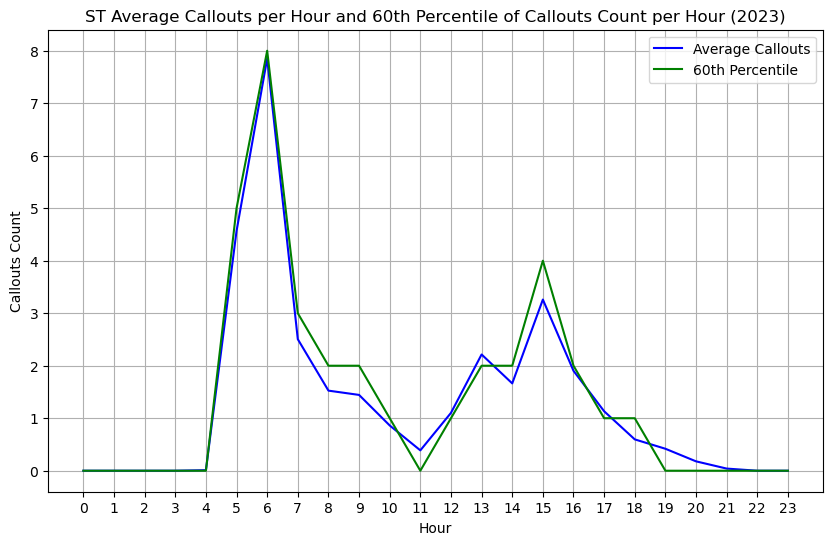

In [37]:
#ST

plt.figure(figsize=(10, 6))

# Plot the average callouts per hour
plt.plot(average_callouts_per_hour['hour'], average_callouts_per_hour['Callouts_Count'], label='Average Callouts', color='blue')

# Plot the 60th percentile of callouts count per hour
plt.plot(percentile_60['hour'], percentile_60['Callouts_Count'], label='60th Percentile', color='green')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Callouts Count')
plt.title('ST Average Callouts per Hour and 60th Percentile of Callouts Count per Hour (2023)')

# Show grid
plt.grid(True)

# Show legend
plt.legend()

hours = list(range(24))
plt.xticks(hours)

# Show the plot
plt.show()

In [38]:
df = FIW

# Step 1: Generate full date range for 2023
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 7, 15)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Create a DataFrame for the full date range with all hours
full_date_range_df = pd.DataFrame({'DATE': np.repeat(date_range, 24),
                                   'hour': np.tile(range(24), len(date_range))})

# Step 2: Merge the full date range with the existing dataset
merged_df = pd.merge(full_date_range_df, df, on=['DATE', 'hour'], how='left')

# Step 3: Fill in missing callout counts with zeros
merged_df['Callouts_Count'].fillna(0, inplace=True)

# Step 4: Calculate the average number of callouts per hour
average_callouts_per_hour = merged_df.groupby('hour')['Callouts_Count'].mean().reset_index()

# Step 5: Calculate the 60th percentile of the callouts count per hour
percentile_60 = merged_df.groupby('hour')['Callouts_Count'].quantile(0.6).reset_index()

print("Average Callouts per Hour:")
print(average_callouts_per_hour)

print("\n60th Percentile of Callouts Count per Hour:")
print(percentile_60)

Average Callouts per Hour:
    hour  Callouts_Count
0      0        0.000000
1      1        0.000000
2      2        0.000000
3      3        0.000000
4      4        0.000000
5      5        0.000000
6      6        0.000000
7      7        0.000000
8      8        0.010204
9      9        0.000000
10    10        0.000000
11    11        0.704082
12    12        0.000000
13    13        0.000000
14    14        0.000000
15    15        0.000000
16    16        0.000000
17    17        0.000000
18    18        0.000000
19    19        0.040816
20    20        0.000000
21    21        0.214286
22    22        8.193878
23    23        0.000000

60th Percentile of Callouts Count per Hour:
    hour  Callouts_Count
0      0             0.0
1      1             0.0
2      2             0.0
3      3             0.0
4      4             0.0
5      5             0.0
6      6             0.0
7      7             0.0
8      8             0.0
9      9             0.0
10    10             0.0
11 

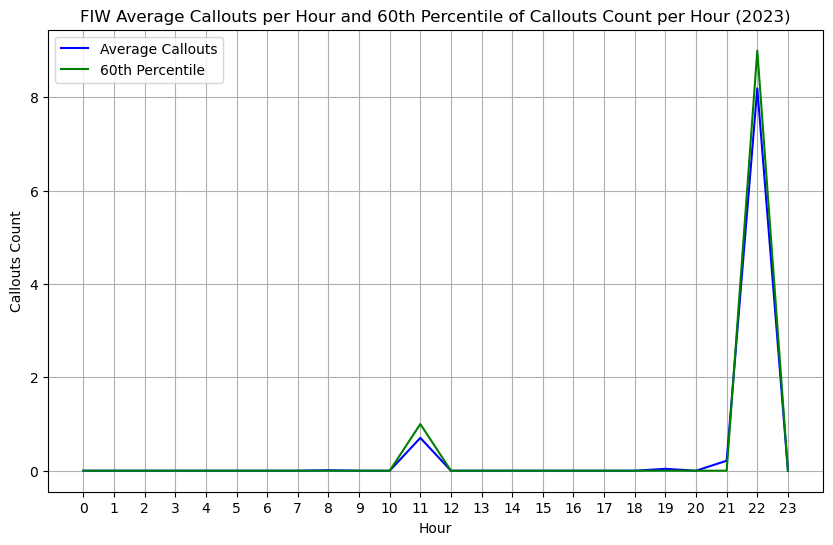

In [39]:
#FIW


plt.figure(figsize=(10, 6))

# Plot the average callouts per hour
plt.plot(average_callouts_per_hour['hour'], average_callouts_per_hour['Callouts_Count'], label='Average Callouts', color='blue')

# Plot the 60th percentile of callouts count per hour
plt.plot(percentile_60['hour'], percentile_60['Callouts_Count'], label='60th Percentile', color='green')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Callouts Count')
plt.title('FIW Average Callouts per Hour and 60th Percentile of Callouts Count per Hour (2023)')

# Show grid
plt.grid(True)

# Show legend
plt.legend()

hours = list(range(24))
plt.xticks(hours)

# Show the plot
plt.show()

In [40]:
df = TRN

# Step 1: Generate full date range for 2023
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 7, 15)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Create a DataFrame for the full date range with all hours
full_date_range_df = pd.DataFrame({'DATE': np.repeat(date_range, 24),
                                   'hour': np.tile(range(24), len(date_range))})

# Step 2: Merge the full date range with the existing dataset
merged_df = pd.merge(full_date_range_df, df, on=['DATE', 'hour'], how='left')

# Step 3: Fill in missing callout counts with zeros
merged_df['Callouts_Count'].fillna(0, inplace=True)

# Step 4: Calculate the average number of callouts per hour
average_callouts_per_hour = merged_df.groupby('hour')['Callouts_Count'].mean().reset_index()

# Step 5: Calculate the 60th percentile of the callouts count per hour
percentile_60 = merged_df.groupby('hour')['Callouts_Count'].quantile(0.6).reset_index()

print("Average Callouts per Hour:")
print(average_callouts_per_hour)

print("\n60th Percentile of Callouts Count per Hour:")
print(percentile_60)

Average Callouts per Hour:
    hour  Callouts_Count
0      0        0.000000
1      1        0.000000
2      2        0.000000
3      3        0.010204
4      4        0.000000
5      5        0.000000
6      6        2.581633
7      7        0.081633
8      8        0.198980
9      9        0.000000
10    10        0.000000
11    11        0.025510
12    12        0.000000
13    13        0.015306
14    14        1.602041
15    15        0.015306
16    16        0.000000
17    17        0.000000
18    18        0.000000
19    19        0.000000
20    20        0.000000
21    21        0.010204
22    22        0.005102
23    23        0.000000

60th Percentile of Callouts Count per Hour:
    hour  Callouts_Count
0      0             0.0
1      1             0.0
2      2             0.0
3      3             0.0
4      4             0.0
5      5             0.0
6      6             3.0
7      7             0.0
8      8             0.0
9      9             0.0
10    10             0.0
11 

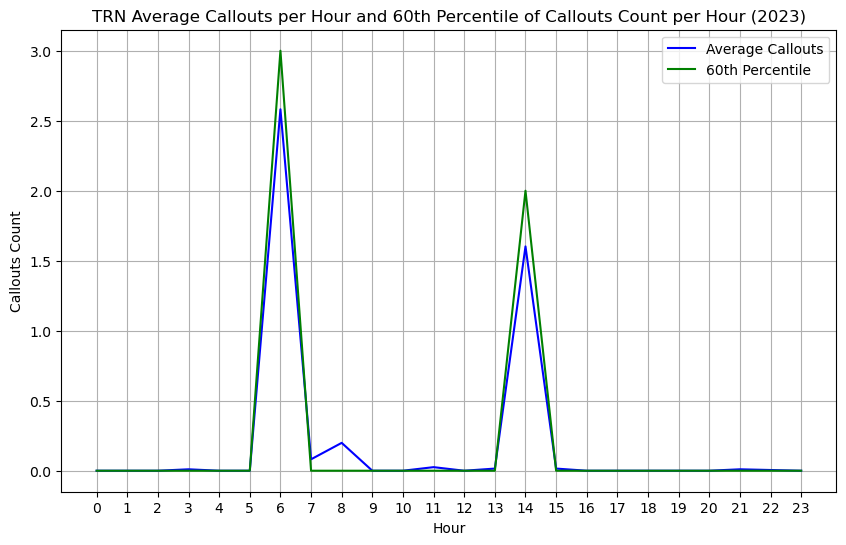

In [41]:
#TRN

plt.figure(figsize=(10, 6))

# Plot the average callouts per hour
plt.plot(average_callouts_per_hour['hour'], average_callouts_per_hour['Callouts_Count'], label='Average Callouts', color='blue')

# Plot the 60th percentile of callouts count per hour
plt.plot(percentile_60['hour'], percentile_60['Callouts_Count'], label='60th Percentile', color='green')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Callouts Count')
plt.title('TRN Average Callouts per Hour and 60th Percentile of Callouts Count per Hour (2023)')

# Show grid
plt.grid(True)

# Show legend
plt.legend()

hours = list(range(24))
plt.xticks(hours)

# Show the plot
plt.show()